In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
symbol = "TSLA"
url = "https://query1.finance.yahoo.com/v7/finance/download/{}?period1=663558948&period2=2695094948&interval=1d&events=history&includeAdjustedClose=true".format(symbol)
df_daily = pd.read_csv(url, parse_dates=["Date"])
df_daily = df_daily.set_index("Date")
display(df_daily)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-09-12,270.760010,278.390015,266.600006,267.480011,267.480011,135999900
2023-09-13,270.070007,274.980011,268.100006,271.299988,271.299988,111673700
2023-09-14,271.320007,276.709991,270.420013,276.040009,276.040009,107709800


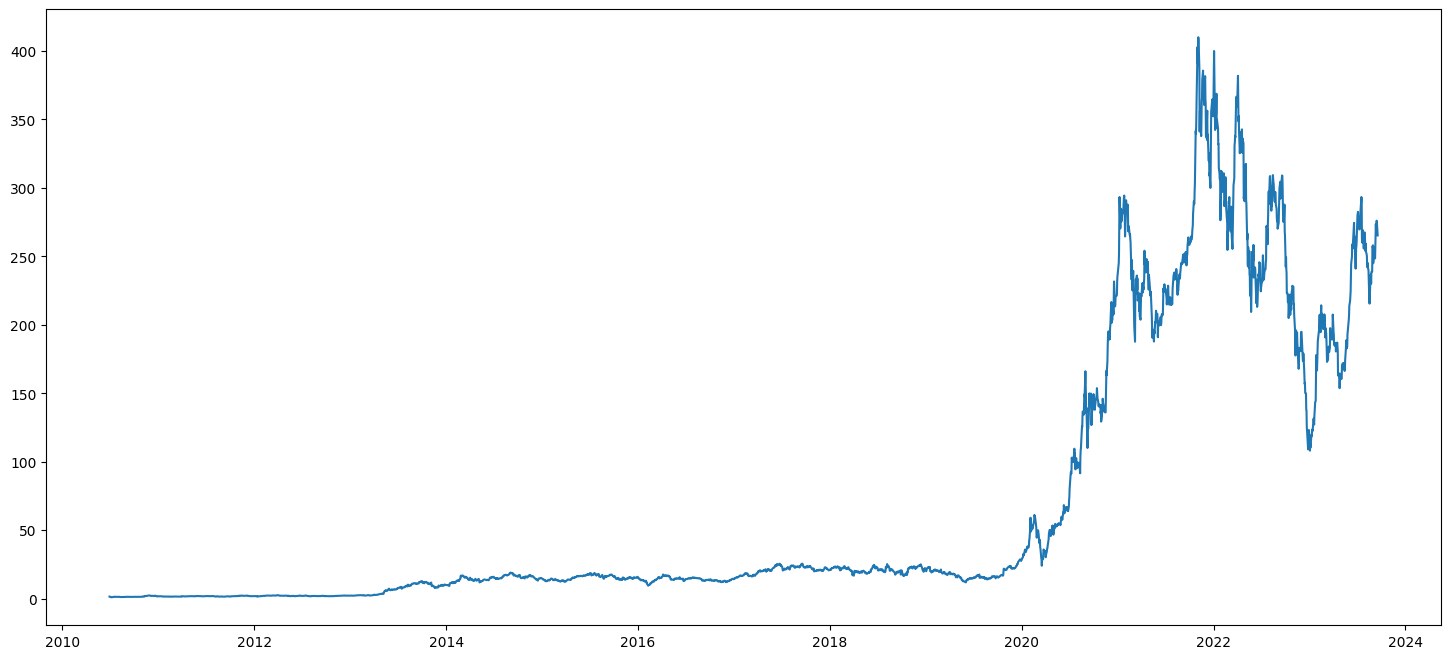

In [20]:
fix, ax = plt.subplots(figsize=(18,8))
ax.plot(df_daily["Close"], "-");

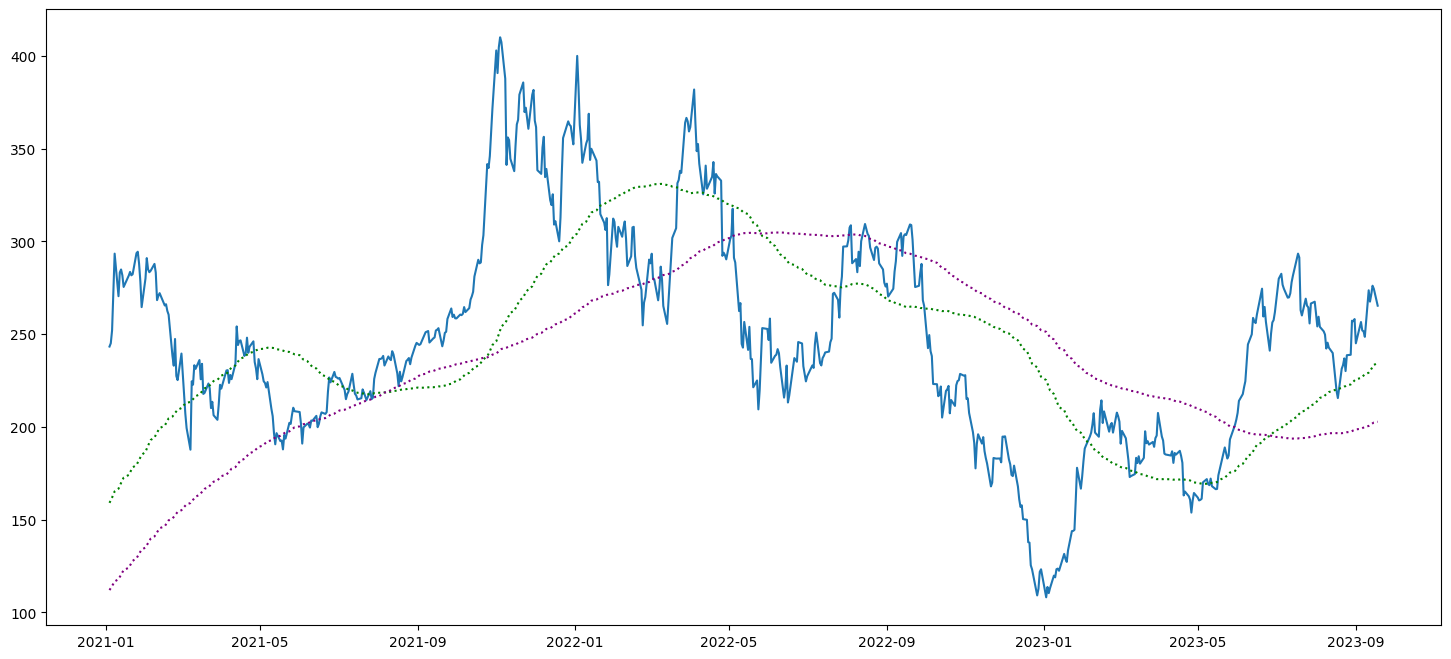

In [32]:
df_daily["SMA30"] = df_daily["Close"].rolling(30).mean()
df_daily["SMA100"] = df_daily["Close"].rolling(100).mean()
df_daily["SMA200"] = df_daily["Close"].rolling(200).mean()
df_daily["HH100"] = df_daily["Close"].rolling(100).max()
df_daily["LL100"] = df_daily["Close"].rolling(100).min()


df_sample = df_daily.copy()[ df_daily.index.year > 2020 ]
fix, ax = plt.subplots(figsize=(18,8))
ax.plot(df_sample["Close"], "-");
#ax.plot(df_sample["SMA30"], ":", color="red");
ax.plot(df_sample["SMA100"], ":", color="green");
ax.plot(df_sample["SMA200"], ":", color="purple");

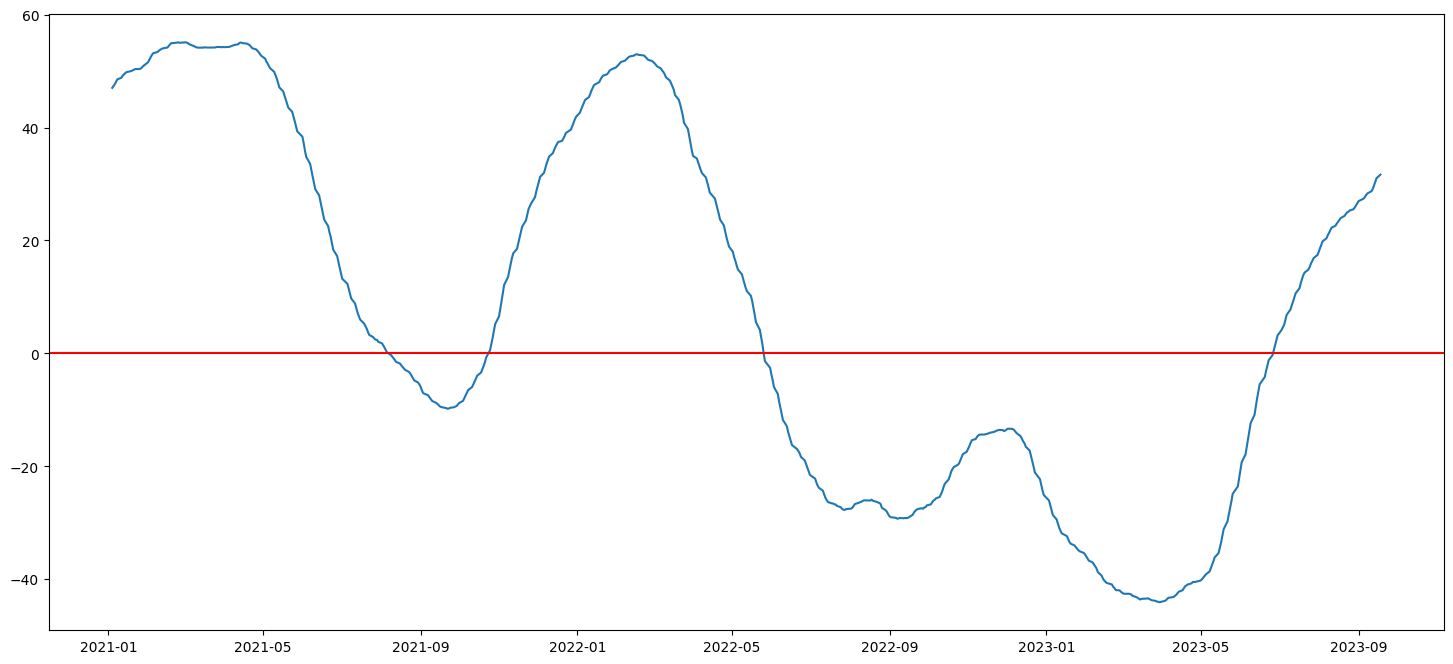

In [34]:
df_daily["MACD"] = df_daily["SMA100"] - df_daily["SMA200"]

df_sample = df_daily.copy()[ df_daily.index.year > 2020 ]
fix, ax = plt.subplots(figsize=(18,8))
ax.plot(df_sample["MACD"], "-")
ax.axhline(y=0, color="r");

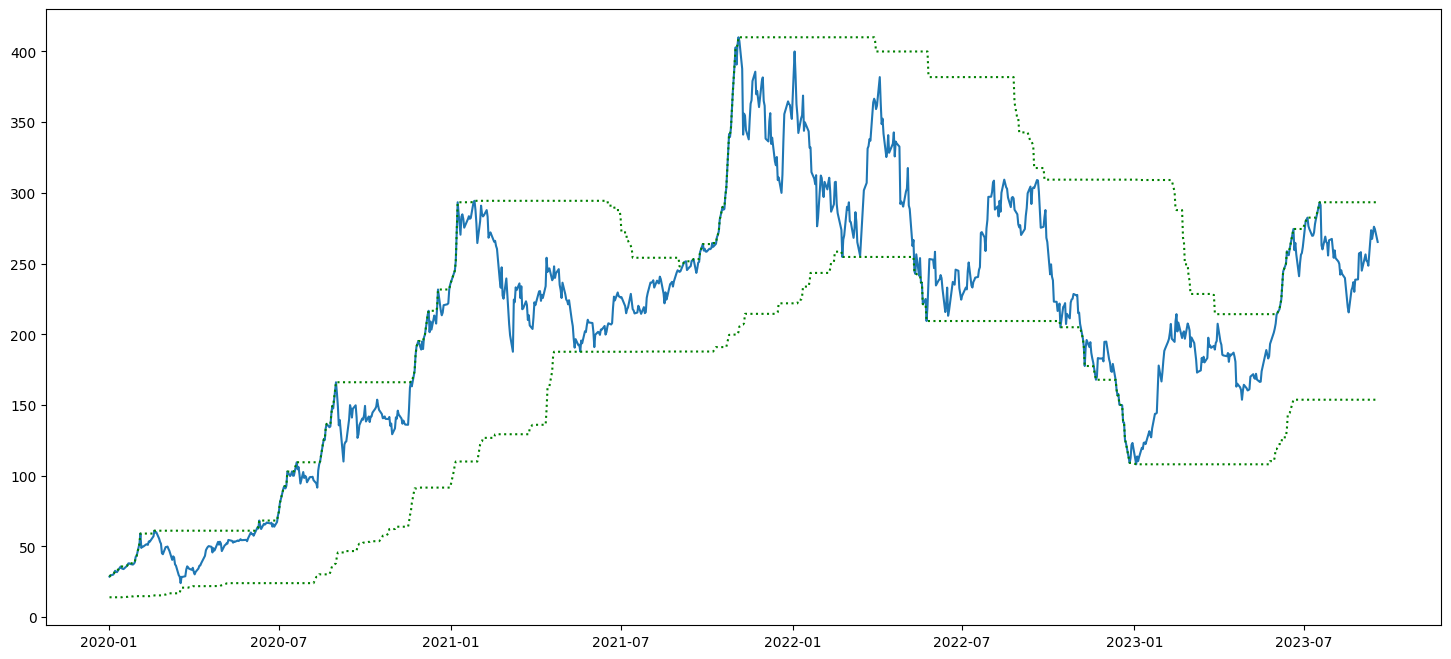

In [38]:
df_sample = df_daily.copy()[ df_daily.index.year > 2019 ]
fix, ax = plt.subplots(figsize=(18,8))
ax.plot(df_sample["Close"], "-");
ax.plot(df_sample["HH100"], ":", color="green");
ax.plot(df_sample["LL100"], ":", color="green");

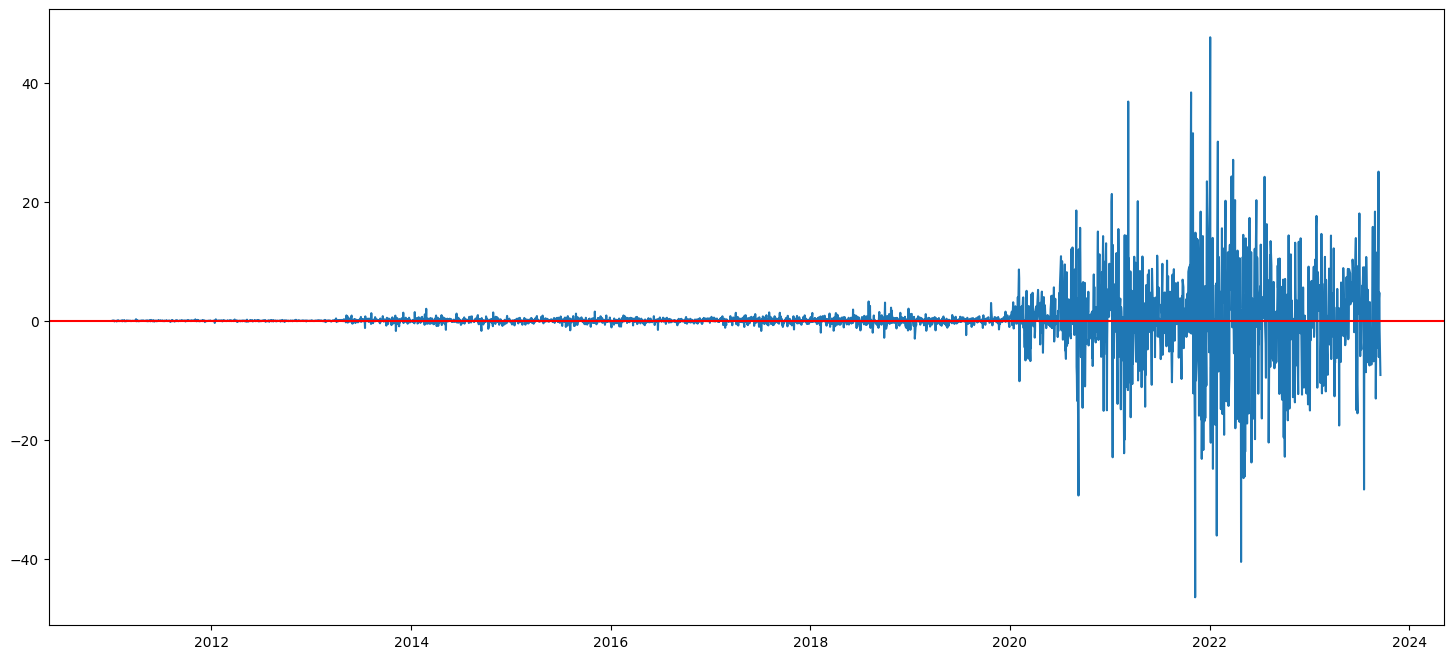

In [46]:
df_daily["Change"] = df_daily.Close - df_daily.Close.shift(1)

df_sample = df_daily.copy()[ df_daily.index.year > 2010 ]
fix, ax = plt.subplots(figsize=(18,8))
ax.plot(df_sample["Change"], "-")
ax.axhline(y=0, color="r");

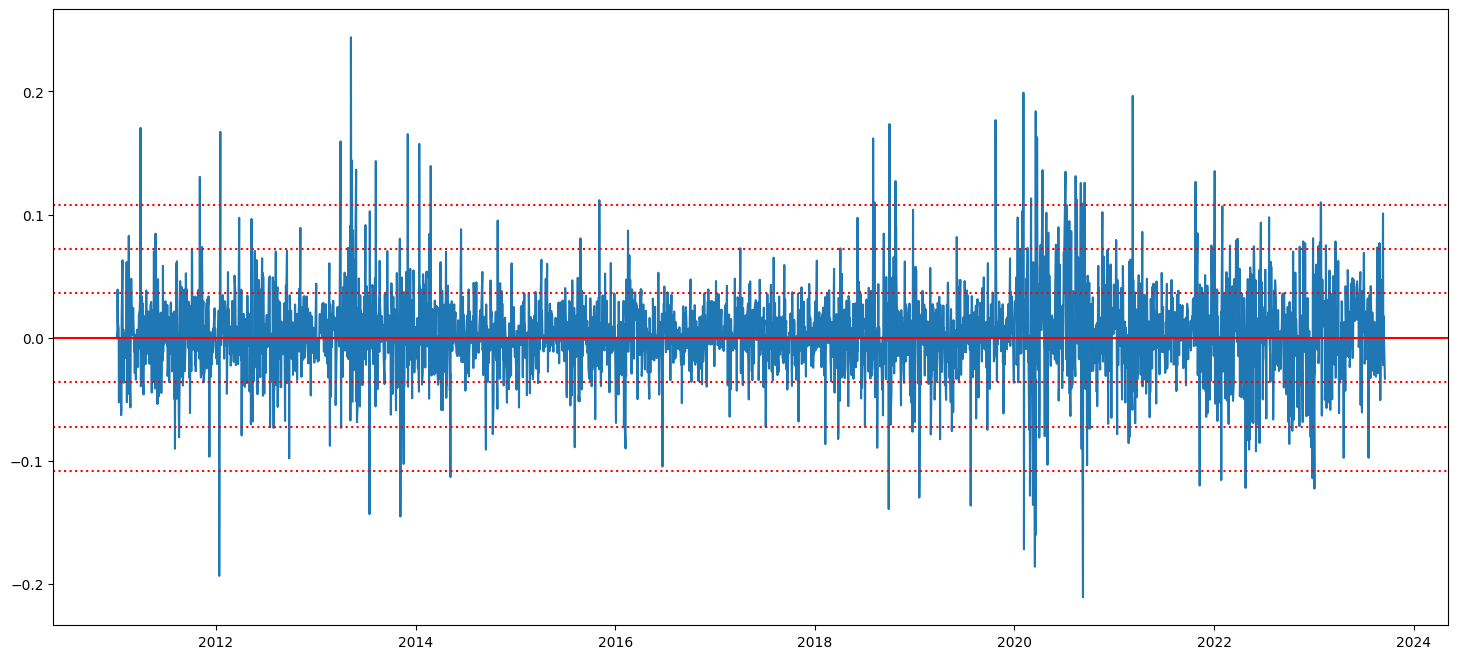

In [55]:
df_daily["ChangePerc"] = df_daily["Change"] / df_daily["Close"].shift(1)
std = df_daily["ChangePerc"].std()

df_sample = df_daily.copy()[ df_daily.index.year > 2010 ]
fix, ax = plt.subplots(figsize=(18,8))
ax.plot(df_sample["ChangePerc"], "-")
ax.axhline(y=0, color="r", linestyle="-")
ax.axhline(y=std, color="r", linestyle=":")
ax.axhline(y=-std, color="r", linestyle=":")

ax.axhline(y=std*2, color="r", linestyle=":")
ax.axhline(y=-std*2, color="r", linestyle=":")

ax.axhline(y=std*3, color="r", linestyle=":")
ax.axhline(y=-std*3, color="r", linestyle=":")

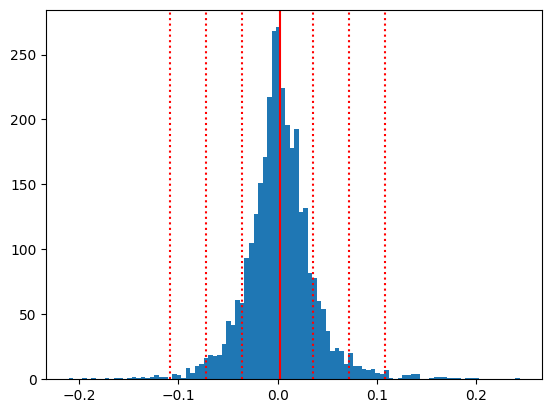

In [61]:
data = list(df_daily["ChangePerc"])
mean = df_daily["ChangePerc"].mean()
std = df_daily["ChangePerc"].std()

plt.hist(data, bins=100);
plt.axvline(mean, color="r", linestyle="-")
plt.axvline(std, color="r", linestyle=":")
plt.axvline(-std, color="r", linestyle=":")

plt.axvline(std*2, color="r", linestyle=":")
plt.axvline(-std*2, color="r", linestyle=":")

plt.axvline(std*3, color="r", linestyle=":")
plt.axvline(-std*3, color="r", linestyle=":")

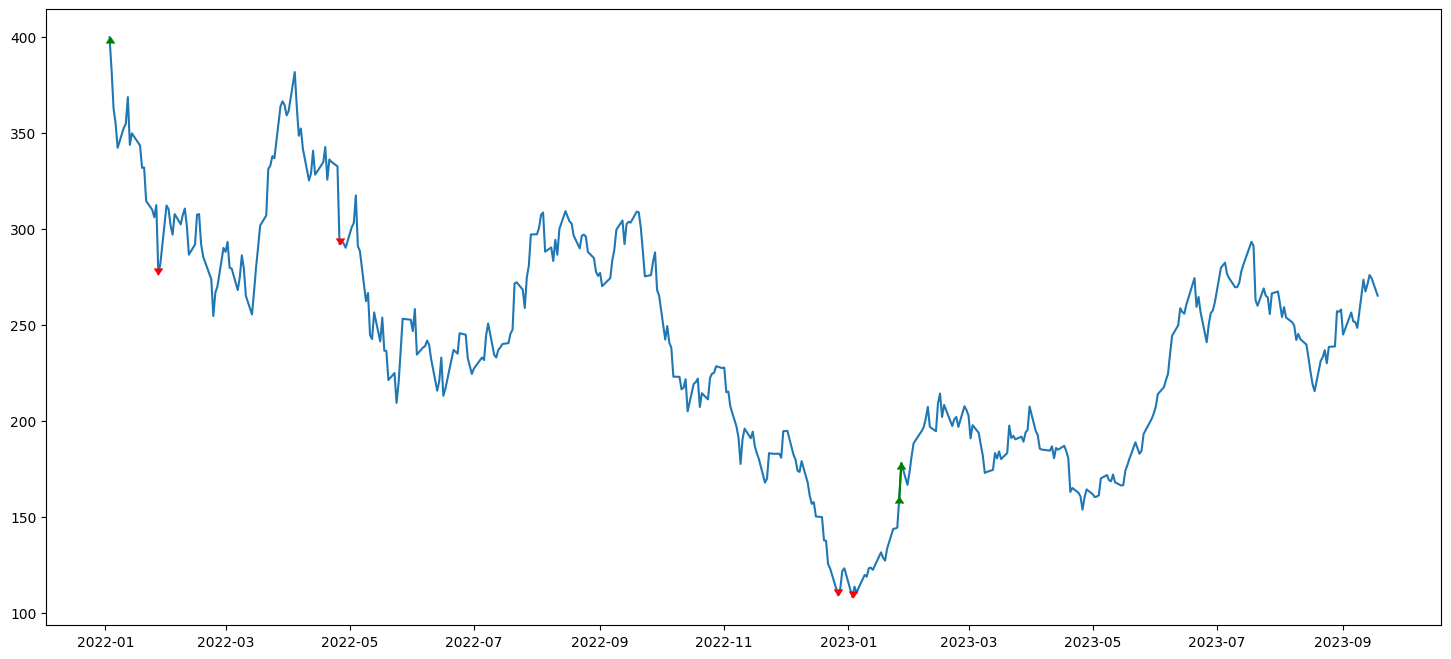

In [86]:
df_daily["BigChangeUp"] = df_daily.apply(lambda x: x["Close"] if x["ChangePerc"]>std*3 else np.nan , axis=1)
df_daily["BigChangeDown"] = df_daily.apply(lambda x: x["Close"] if x["ChangePerc"]<-std*3 else np.nan , axis=1)


df_sample = df_daily.copy()[ df_daily.index.year > 2021 ]
fix, ax = plt.subplots(figsize=(18,8))
ax.plot(df_sample["Close"], "-");
ax.plot(df_sample["BigChangeUp"], marker=6, color="green");
ax.plot(df_sample["BigChangeDown"], marker=7, color="red");
